## Import required packages: NetworkX, Pandas, and Matplotlib
* Pandas is a Python data analysis library
* Matplotlib is a Python data plotting (visualisation) library


# Network Science 1
### Analysing networks using the [NetworkX](https://networkx.org/) Python package

**Date:** 20 March 2023


**Authors:** Remzi Celebi, Pedro Hernandez-Serrano, Kody Moodley, Leto Peel

**Affiliations:** [Institute of Data Science](https://www.maastrichtuniversity.nl/research/institute-data-science) & [The Maastricht Law & Tech Lab](https://www.maastrichtuniversity.nl/about-um/faculties/law/research/law-and-tech-lab)

**License:** [GNU Affero General Public License v3 (AGPL-3.0)](https://www.gnu.org/licenses/agpl-3.0.en.html)


**What is NetworkX?**

[NetworkX](https://networkx.github.io/documentation/networkx-1.9/index.html) is a Python software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

**Notebook description:**

This is a notebook which demonstrates the basic features for constructing and analysing networks using the [NetworkX](https://networkx.org/) Python package.

* We will introduce basic NetworkX features required for constructing simple networks from scratch by creating the individual nodes and edges in the network "by hand".
* We will then demonstrate some common network analysis tasks that one can apply to the network to describe some of its characteristics. These characteristics can be either global or local in scope:
    * global characteristics: pertain to the network as a whole
    * local characteristics: pertain to parts of the network, such as:
        * a subset of the nodes and edges within the full network (a subnetwork),
        * individual nodes, or
        * individual edges

**Important considerations:**

* NetworkX is designed mainly for constructing and analysing networks. Although it does provide rudimentary visualisation capabilities for small networks (up to hundreds of nodes), visualisation is not a main function of the library and therefore its performance and capabilities are quite limited w.r.t. visualisation. However, networks constructed with NetworkX can be saved and imported downstream into more powerful network visualisation platforms e.g. [Cytoscape](https://cytoscape.org/)
* In this tutorial we generally use the terms "graph" and "network" interchangeably

**Useful reading:**
* Textbook on Network Science by [Albert-László Barabási](https://barabasi.com/): **[link](http://networksciencebook.com/)**
* NetworkX package documentation: **[link](https://networkx.org/documentation/stable/)**
* Tutorial on applying NetworkX to study humanities network data by [John R. Ladd et al.](https://jrladd.com/): **[link](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python)**

**Learning objectives:** 

How to exploit the basic capabilities of the NetworkX package to construct and analyse networks, independent of their topic 

**Instructions:**

The notebook is split into 2 parts:

* Part A: how to construct networks "by hand" using NetworkX.
* Part B: how to perform basic analysis of networks using NetworkX 


**Pre-requisite knowledge:**

Understanding of what a network is: a set of nodes and edges describing relationships between entities in the real world


In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
g = nx.Graph()

## Part A: Creating a network using NetworkX
Construct a blank network which we will call 'g'

### A1. Nodes

Add new nodes to the network. In the parentheses of the add_node() method you should add the unique name of that node. We can use either numbers e.g. 1 or text e.g. 'node1' 

In [5]:
g.add_node(1)
g.add_node('node1')

We can also add more than one node at a time by specifying a range of values for their names. The first command in the cell below will add three nodes to the network named 'a', 'b' and 'c'. The second command in the cell below will add two nodes to the network named: 2 and 5.

In [6]:
g.add_nodes_from(['a','b','c'])
g.add_nodes_from([2,5])

Another way to add more than one node at a time using a for loop

In [7]:
for num in range(6,11):
  g.add_node(num)

Print the names of all nodes currently in the network

In [8]:
g.nodes()

NodeView((1, 'node1', 'a', 'b', 'c', 2, 5, 6, 7, 8, 9, 10))

You can remove individual nodes using the command remove_node()

In [9]:
g.remove_node('c')

In [10]:
g.nodes()

NodeView((1, 'node1', 'a', 'b', 2, 5, 6, 7, 8, 9, 10))

Visualise the network so far

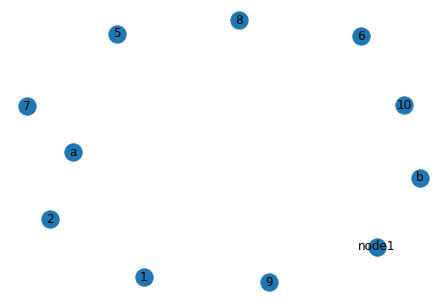

In [11]:
nx.draw(g, with_labels=True)

Hmmm... its just nodes in there. No edges. A never-to-be-named philosopher once asked about Network Science: "Do edges matter?" The question turned out to be most unwise! Of course you need edges! Let's add some... To add an edge, use the add_edge() method and supply the names of two nodes that this edge should connect.

### A2. Edges

In [12]:
g.add_edge(7,6)

If you want to add multiple edges at a time, use the add_edges_from() command and supply a list of tuples e.g. [(x1,y1), (x2,y2), ..., (xn, yn)] to add edges between xi and yi for 1 <= i <= n. 

In [13]:
g.add_edges_from([(1, 2) , (1, 3), (4,8), (8,5), (3,4), (7,1), ('node1', 10), (10,7), ('b', 9), ('a', 8), (3,'b'), (9,10), (4, 9)])

Let's visualise the graph again now after adding some edges

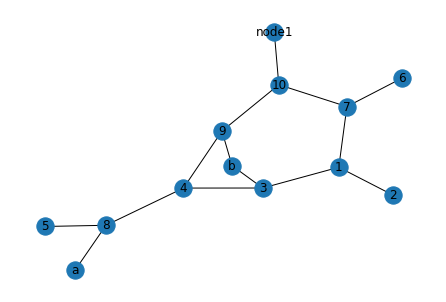

In [14]:
nx.draw(g, with_labels=True)

Cool! Looks like a network now. 

## Part B: Analysing networks using NetworkX

### B1. Global characteristics

In [15]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.5 MB/s eta 0:00:00


In [16]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

In [17]:
g = rdflib.Graph()
g.parse('https://raw.githubusercontent.com/MaastrichtU-IDS/UM_KEN4256_KnowledgeGraphs/master/2021-data-food/yummly-recipes/yummly-recipes.ttl', format='ttl') 

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '13200.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '1800.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '11760.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '13

<Graph identifier=N9851da00ca854ddc850a73964cde8d1d (<class 'rdflib.graph.Graph'>)>

##  Converting rdflib.Graph to networkx.Graph

Thanks to [the great work done by the rdflib developers](https://github.com/RDFLib/rdflib/blob/master/rdflib/extras/external_graph_libs.py) this step, which converts the basic graph data structure of rdflib into its equivalent in networkx, is straightforward. Just run the next cell to make our RDF dataset ready for network analysis!

In [18]:
mdg = rdflib_to_networkx_multidigraph(g)
dg = rdflib_to_networkx_digraph(g)
#gx = rdflib_to_networkx_graph(g)
# A graph is defined to be a simple graph if there is at most one edge connecting any pair of vertices and an edge does not loop to connect a vertex to itself.

Number of nodes in the network

In [19]:
mdg.number_of_nodes() # also g.order()

57534

Number of edges in the network

In [20]:
mdg.number_of_edges() # also g.size()

354751

[Average "degree"](http://networksciencebook.com/chapter/2#degree) of the network

In [21]:
degrees = [val for (node, val) in mdg.degree()]  # gets the degrees of each node in the network
sum_degrees = sum(degrees) # sums up all the degrees of all nodes in the network
avg_degree_g = sum_degrees / mdg.number_of_nodes() # calculate average degree of network by dividing sum of all node degrees and dividing by number of nodes
avg_degree_g 

12.331873327076163

## Centrality Measures

**Degree centrality**  
A measure of the "connectedness" of a node to all other nodes in a network. "For particular node, it is the fraction of nodes in the graph that it is connected to."

In [22]:
results = nx.degree_centrality(mdg)


for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True)[:10]:
        print("{:6.3f} {}".format(rank, node_id))

 0.288 http://purl.org/ontology/fo/Recipe
 0.288 Main Dishes
 0.190 4
 0.144 https://w3id.org/um/ken4256/ingredient/salt
 0.094 https://w3id.org/um/ken4256/ingredient/onions
 0.090 http://purl.org/ontology/fo/Ingredient
 0.078 https://w3id.org/um/ken4256/ingredient/garlic
 0.078 https://w3id.org/um/ken4256/ingredient/olive_oil
 0.072 0.0
 0.071 3


In [23]:
results = nx.degree_centrality(mdg)

topn = 0
for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True):
      if node_id.startswith('https://w3id.org/um/ken4256/recipe/'):
        print("{:6.5f} {}".format(rank, node_id))
        topn += 1
        if topn > 10:
          break

0.00089 https://w3id.org/um/ken4256/recipe/Quinoa-Topped-Zucchini-Rounds-1059539
0.00080 https://w3id.org/um/ken4256/recipe/Hunan-Chicken-473159
0.00078 https://w3id.org/um/ken4256/recipe/Miso-Mushroom-Udon-with-Tempura-Vegetables-1768693
0.00078 https://w3id.org/um/ken4256/recipe/Yogurt-Lemon-Chicken-and-Feta-Salad-1083701
0.00076 https://w3id.org/um/ken4256/recipe/Thai-Chicken-Tacos-_with-Bean-Sprout-Slaw-_-Peanut-Sauce_-1325442
0.00076 https://w3id.org/um/ken4256/recipe/Miso-Mushroom-Ramen-with-Vegetarian-Wontons-and-Crispy-Tofu-1001791
0.00076 https://w3id.org/um/ken4256/recipe/Pickled-Shrimp-1275111
0.00075 https://w3id.org/um/ken4256/recipe/Moroccan-Lamb-Tagine-1491556
0.00075 https://w3id.org/um/ken4256/recipe/The-Ultimate-Beef-Wellington-Food-Network-285338
0.00073 https://w3id.org/um/ken4256/recipe/Miso-Chashu-Ramen-1483783
0.00073 https://w3id.org/um/ken4256/recipe/Thai-Steak-and-Noodle-Salad-1560792


**Closeness centrality**   
Notice that higher values of closeness indicate higher centrality.

For a particular node $u$, it is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances $n-1$.  

$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$  
where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.  

In [24]:
results = nx.closeness_centrality(mdg)
ind_rank = {}

for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True)[:10]:
        print("{:6.3f} {}".format(rank, node_id))

 0.288 http://purl.org/ontology/fo/Recipe
 0.288 Main Dishes
 0.215 http://purl.org/ontology/fo/Ingredient
 0.190 4
 0.145 http://purl.org/ontology/fo/Cuisine
 0.144 https://w3id.org/um/ken4256/ingredient/salt
 0.094 https://w3id.org/um/ken4256/ingredient/onions
 0.078 https://w3id.org/um/ken4256/ingredient/garlic
 0.078 https://w3id.org/um/ken4256/ingredient/olive_oil
 0.072 salt


In [25]:
print("EIGENVECTOR CENTRALITY")
results = nx.eigenvector_centrality(mdg)
ind_rank = {}

for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True)[:10]:
        print("{:6.3f} {}".format(rank, node_id))

EIGENVECTOR CENTRALITY


NetworkXNotImplemented: ignored

In [27]:
print("EIGENVECTOR CENTRALITY")
results = nx.eigenvector_centrality(dg)
ind_rank = {}

for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True)[:10]:
        print("{:6.3f} {}".format(rank, node_id))

EIGENVECTOR CENTRALITY
 0.991 http://purl.org/ontology/fo/Ingredient
 0.107 http://purl.org/ontology/fo/Cuisine
 0.039 salt
 0.026 onions
 0.021 garlic
 0.021 olive oil
 0.017 http://purl.org/ontology/fo/Recipe
 0.017 Main Dishes
 0.017 pepper
 0.014 garlic cloves


Ranking with PageRank

In [28]:
page_rank = nx.pagerank(dg)

for node_id, rank in sorted(page_rank.items(), key=lambda item: item[1], reverse=True)[:10]:
        print("{:3} {:6.3f} ".format(node_id, rank,))



http://purl.org/ontology/fo/Ingredient  0.066 
http://purl.org/ontology/fo/Recipe  0.009 
Main Dishes  0.009 
4    0.006 
http://purl.org/ontology/fo/Cuisine  0.005 
https://w3id.org/um/ken4256/ingredient/salt  0.004 
https://w3id.org/um/ken4256/ingredient/onions  0.003 
0.0  0.002 
https://w3id.org/um/ken4256/ingredient/olive_oil  0.002 
3    0.002 


In [29]:

# Clusters
cl = nx.clustering(dg)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()

Streaming output truncated to the last 5000 lines.
Cluster 52535 has 40 nodes
Cluster 52536 has 57 nodes
Cluster 52537 has 11 nodes
Cluster 52538 has 44 nodes
Cluster 52539 has 50 nodes
Cluster 52540 has 38 nodes
Cluster 52541 has 30 nodes
Cluster 52542 has 43 nodes
Cluster 52543 has 11 nodes
Cluster 52544 has 32 nodes
Cluster 52545 has 40 nodes
Cluster 52546 has 14 nodes
Cluster 52547 has 25 nodes
Cluster 52548 has 24 nodes
Cluster 52549 has 28 nodes
Cluster 52550 has 28 nodes
Cluster 52551 has 22 nodes
Cluster 52552 has 29 nodes
Cluster 52553 has 54 nodes
Cluster 52554 has 27 nodes
Cluster 52555 has 47 nodes
Cluster 52556 has 34 nodes
Cluster 52557 has 40 nodes
Cluster 52558 has 32 nodes
Cluster 52559 has 27 nodes
Cluster 52560 has 27 nodes
Cluster 52561 has 16 nodes
Cluster 52562 has 15 nodes
Cluster 52563 has 23 nodes
Cluster 52564 has 29 nodes
Cluster 52565 has 23 nodes
Cluster 52566 has 26 nodes
Cluster 52567 has 30 nodes
Cluster 52568 has 42 nodes
Cluster 52569 has 25 nodes
Clus

Some algorithms work only for undirected graphs and others are not well defined for directed graphs.

> Indented block


To treat a directed graph as undirected for some we should convert it using Graph.to_undirected()

In [30]:
def transform_str(x):
    return str(x)

In [31]:
dg = rdflib_to_networkx_digraph(g, transform_s=transform_str, transform_o =transform_str)

In [32]:
G = dg.to_undirected()

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '11400.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '11760.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '4200.0'
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/rdflib/term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '12

## Link prediction algorithms
There are existing link prediction algorithms implemented in NetworkX for undirected network:
[Link](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)

In [33]:
import math
def getNeighbors(net, x):
    if x in net:
        return net[x]
    else:
        return []

def commonNeighbors(net, x, y, weights={}):
    if x== y:
        return len(getNeighbors(net,x))

    commons =set(getNeighbors(net,x)).intersection(getNeighbors(net,y))
    return len(commons)

def jaccard(net,x,y,weights={}):
    if x == y:
        return 1

    commons =set(getNeighbors(net,x)).intersection(getNeighbors(net,y))
    unions = set(getNeighbors(net,x)).union(getNeighbors(net,y))
    if len(unions) == 0:
        return 0.0
    return float(len(commons))/len(unions)

def adamic(net,x,y,weights={}):
    commons =set(getNeighbors(net,x)).intersection(getNeighbors(net,y))
    score =0.0
    for n in commons:
        if len(getNeighbors(net,n)) != 0:
          score += 1.0/math.log(float(len(getNeighbors(net,n))))

    return score

In [34]:
u = 'https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580'
v = 'https://w3id.org/um/ken4256/recipe/Chicken-Parmesan-1055410'

In [35]:
G[u]

AtlasView({'https://w3id.org/um/ken4256/ingredient/oil': {'triples': [(rdflib.term.URIRef('https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580'), rdflib.term.URIRef('http://purl.org/ontology/fo/ingredients'), rdflib.term.URIRef('https://w3id.org/um/ken4256/ingredient/oil'))], 'weight': 1}, 'Main Dishes': {'triples': [(rdflib.term.URIRef('https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580'), rdflib.term.URIRef('http://purl.org/ontology/fo/course'), rdflib.term.Literal('Main Dishes'))], 'weight': 1}, '4': {'triples': [(rdflib.term.URIRef('https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580'), rdflib.term.URIRef('http://purl.org/ontology/fo/rating'), rdflib.term.Literal('4', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))], 'weight': 1}, 'https://w3id.org/um/ken4256/ingredient/sour_cream': {'triples': [(rdflib.term.URIRef('https://w3id.org/um/ken4256/recip

In [36]:
len(set(G[u]))

17

In [37]:
union_size = len(set(dg[u]) | set(dg[v]))

In [38]:
jaccard(G, u, v)

0.15151515151515152

In [39]:
adamic(G, u, v)

0.5466322032480424

In [40]:
preds= nx.jaccard_coefficient(G,[(u,v)])

In [41]:
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580, https://w3id.org/um/ken4256/recipe/Chicken-Parmesan-1055410) -> 0.15151515


In [42]:
preds= nx.adamic_adar_index(G,[(u,v)])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(https://w3id.org/um/ken4256/recipe/Csirke-Paprikash-_-Chicken-Paprikash-Food_com-168580, https://w3id.org/um/ken4256/recipe/Chicken-Parmesan-1055410) -> 0.54663220


# **Lab Tasks**

In the following tasks you are going to apply some of the network metrics demonstrated in Parts A & B of this notebook to answer some questions about the food knowledge graph located at: https://github.com/MaastrichtU-IDS/UM_KEN4256_KnowledgeGraphs/blob/master/2021-data-food/yummly-recipes/yummly-recipes.ttl

You will have to identify in each task which methods and networkx features covered in this notebook are needed to complete that task.


# **Task 1:**

Using the "proximal" or "network" notion of similarity, calculate the similarity of the ingredients "salt" and "onions" in the food knowledge graph, using at least two different similarity measures (e.g. Jaccard coefficient). Compare the similarity scores between "salt" and "onions" with the similarity scores between "salt" and "black pepper". Is the similarity of "salt" and "onions" higher than the similarity of "salt" and "black pepper" in this graph?

# **Task 2:**

Using network similarity, find the top 10 most similar ingredients to "golden zucchini". Use at least two different similarity measures to complete this task and compare the results between the two measures. Is there unanimous agreement among the measures that you used in terms of the top 10 most similar ingredients to "golden zucchini"?  If not, what is the disagreement?

# **Task 3:**

Find the ingredient(s) that is (are) used in the most number of unique recipes in the food knowledge graph.